In [4]:
import os
os.getcwd()


'C:\\Users\\sumanth'

In [5]:
os.chdir("C:\\Data Science\\Projects\\Kaggle-Mall customer segmentation")

In [6]:
os.listdir()

['Mall_Customers.csv']

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 



In [9]:
customers = pd.read_csv('Mall_Customers.csv')



customers.head(10) #Printing first 10 rows of the dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [10]:
customers.shape

(200, 5)

In [11]:
customers.info()  #no missing values it seems

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
# feature selection. let us segment customers based on annual income and spending score
X=customers.iloc[:,[3,4]]

In [13]:
X.head(10)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


In [16]:
# Let us build K-means clustering...use elbow method
from sklearn.cluster import KMeans

In [22]:
wcss=[]  #within cluster sum of squares
#let us assume 10 is the max# of clusters
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    print(kmeans)
    wcss.append(kmeans.inertia_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=

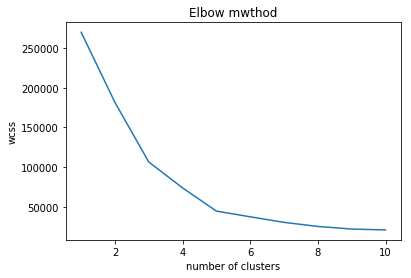

In [23]:
plt.plot(range(1,11),wcss)
plt.title("Elbow mwthod")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

In [24]:
# if you observe the above visual, u will see that last elbow comes at 5
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

In [25]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [33]:
cluster0=X[y_kmeans==0]
cluster1=X[y_kmeans==1]
cluster2=X[y_kmeans==2]
cluster3=X[y_kmeans==3]
cluster4=X[y_kmeans==4]

In [34]:
cluster0

,Annual Income (k$),Spending Score (1-100)
124,70,29
128,71,11
130,71,9
134,73,5
136,73,7
138,74,10
140,75,5
144,77,12
146,77,36
148,78,22


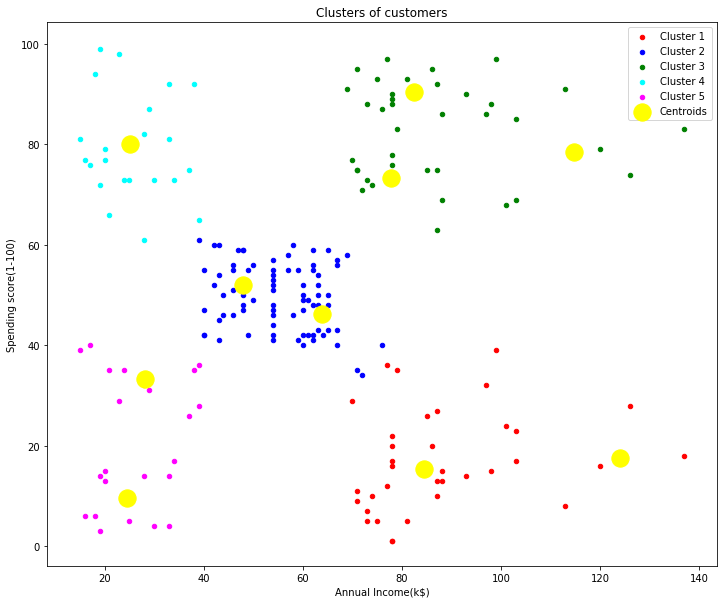

In [42]:
plt.figure(figsize=(12,10))
plt.scatter(x=cluster0.iloc[:,0],y=cluster0.iloc[:,1],s=20,c="red",label="Cluster 1")
plt.scatter(x=cluster1.iloc[:,0],y=cluster1.iloc[:,1],s=20,c="blue",label="Cluster 2")
plt.scatter(x=cluster2.iloc[:,0],y=cluster2.iloc[:,1],s=20,c="green",label="Cluster 3")
plt.scatter(x=cluster3.iloc[:,0],y=cluster3.iloc[:,1],s=20,c="cyan",label="Cluster 4")
plt.scatter(x=cluster4.iloc[:,0],y=cluster4.iloc[:,1],s=20,c="magenta",label="Cluster 5")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title("Clusters of customers")
plt.xlabel("Annual Income(k$)")
plt.ylabel("Spending score(1-100)")
plt.legend()
plt.show()




In [41]:
kmeansmodel.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])


#Cluster 1 (Red Color) -> earning high but spending less
#cluster 2 (Blue Colr) -> average in terms of earning and spending 
#cluster 3 (Green Color) -> earning high and also spending high [we can also target these people)
#cluster 4 (cyan Color) -> earning less but spending more (we can also target these people)
#Cluster 5 (magenta Color) -> Earning less , spending less